In [1]:
from pandas import DataFrame
import pandas as pd
import numpy as np

## Preprocess

In [2]:
# Load the datas
product = pd.read_csv('Data_01.Pruduct.NoADDNoHit.csv', dtype={"CLNT_ID": np.str, "SESS_ID": np.str, "PD_C": np.str}, thousands=",", usecols = [0,1,2,3,5,6])
custom = pd.read_csv('Data_04.Custom.csv',dtype={"CLNT_ID": np.str})
session = pd.read_csv('Data_05.Session.Day.csv',thousands=",", dtype={"CLNT_ID": np.str, "SESS_ID": np.str})
master = pd.read_csv('Data_06.Master.Col.csv', dtype={"PD_C": np.str},usecols=[0,2,3,4,5])

In [53]:
session.head()

,CLNT_ID,SESS_ID,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,weekday,weekday/weekend
0,5873599,08641867,9,20180509,82.0,1890.0,mobile,Daejeon,Daejeon,Wednesday,weekday
1,5873599,06616320,21,20180611,105.0,1604.0,mobile,Busan,Busan,Monday,weekday
2,5873599,05886172,40,20180624,41.0,632.0,mobile,Daejeon,Daejeon,Sunday,weekend
3,5873884,01050889,15,20180913,160.0,1035.0,mobile,Gyeonggi-do,Anyang,Thursday,weekday
4,5874461,10298270,5,20180412,13.0,298.0,mobile,Seoul,Seoul,Thursday,weekday


In [3]:
m1 = pd.merge(product, custom, on='CLNT_ID', how = 'inner')

In [4]:
del product

In [5]:
session.dropna(inplace=True)
session['SESS_DT'] = pd.to_datetime(session['SESS_DT'], format="%Y%m%d")
session['SESS_month'] = pd.DatetimeIndex(session['SESS_DT']).month
session.drop("SESS_DT", axis=1, inplace=True)
session.head()

,CLNT_ID,SESS_ID,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,weekday,weekday/weekend,SESS_month
0,5873599,08641867,9,82.0,1890.0,mobile,Daejeon,Daejeon,Wednesday,weekday,5
1,5873599,06616320,21,105.0,1604.0,mobile,Busan,Busan,Monday,weekday,6
2,5873599,05886172,40,41.0,632.0,mobile,Daejeon,Daejeon,Sunday,weekend,6
3,5873884,01050889,15,160.0,1035.0,mobile,Gyeonggi-do,Anyang,Thursday,weekday,9
4,5874461,10298270,5,13.0,298.0,mobile,Seoul,Seoul,Thursday,weekday,4


In [6]:
#categorical variable to dummy
categorical_features = ['DVC_CTG_NM', 'ZON_NM', 'SESS_month','weekday','weekday/weekend']
prefix_name = ["DVC","ZON","month",'day','weekend']

for i in range(len(prefix_name)):
    dummies = pd.get_dummies(session[categorical_features[i]], prefix=prefix_name[i])
    session = pd.concat([session, dummies], axis=1)
    session.drop(categorical_features[i], axis=1, inplace=True)
session.head()

,CLNT_ID,SESS_ID,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,CITY_NM,DVC_desktop,DVC_mobile,DVC_tablet,ZON_Busan,...,month_9,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,weekend_weekday,weekend_weekend
0,5873599,08641867,9,82.0,1890.0,Daejeon,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,5873599,06616320,21,105.0,1604.0,Busan,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
2,5873599,05886172,40,41.0,632.0,Daejeon,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,5873884,01050889,15,160.0,1035.0,Anyang,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
4,5874461,10298270,5,13.0,298.0,Seoul,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [7]:
session.drop(['CITY_NM'], axis=1, inplace=True)

In [8]:
m1 = pd.merge(m1, session, on=['CLNT_ID','SESS_ID'], how = 'inner')

In [9]:
labels, uniques = pd.factorize(master['CLAC0_NM'],sort=True)
print(uniques)

Index(['가구/침구/인테리어', '가전/디지털', '반려동물', '스포츠/레저', '식품', '여행/서비스/금융', '유아동',
       '주방/생활/건강', '패션의류', '화장품/뷰티'],
      dtype='object')


In [10]:
dummies = pd.get_dummies(labels, prefix='CLAC0')
master = pd.concat([master, dummies], axis=1)
master.drop(["CLAC0_NM","CLAC1_NM","CLAC2_NM","CLAC3_NM"], axis=1, inplace=True)
master.head()

,PD_C,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
0,064382,0,0,0,1,0,0,0,0,0,0
1,062282,0,0,0,0,0,0,0,0,1,0
2,061729,0,0,0,0,0,0,1,0,0,0
3,061537,0,0,0,0,0,0,0,0,1,0
4,058820,0,0,0,0,0,0,0,0,1,0


In [11]:
m1 = pd.merge(m1, master, on=['PD_C'], how = 'inner')
m1.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_BUY_AM,PD_BUY_CT,CLNT_GENDER,CLNT_AGE,SESS_SEQ,TOT_PAG_VIEW_CT,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
0,4140076,10189797,13,570603,39000,2,F,40,172,18.0,...,0,0,0,1,0,0,0,0,0,0
1,4148106,06537318,21,570603,39000,1,F,30,58,20.0,...,0,0,0,1,0,0,0,0,0,0
2,4148106,06662803,94,570603,39000,1,F,30,55,93.0,...,0,0,0,1,0,0,0,0,0,0
3,5298612,04443505,129,570603,39000,1,F,30,710,179.0,...,0,0,0,1,0,0,0,0,0,0
4,5553084,06453463,55,570603,39000,1,F,30,772,123.0,...,0,0,0,1,0,0,0,0,0,0


In [12]:
m1['CLAC0_0'] = m1['CLAC0_0']*m1['PD_BUY_CT']
m1['CLAC0_1'] = m1['CLAC0_1']*m1['PD_BUY_CT']
m1['CLAC0_2'] = m1['CLAC0_2']*m1['PD_BUY_CT']
m1['CLAC0_3'] = m1['CLAC0_3']*m1['PD_BUY_CT']
m1['CLAC0_4'] = m1['CLAC0_4']*m1['PD_BUY_CT']
m1['CLAC0_5'] = m1['CLAC0_5']*m1['PD_BUY_CT']
m1['CLAC0_6'] = m1['CLAC0_6']*m1['PD_BUY_CT']
m1['CLAC0_7'] = m1['CLAC0_7']*m1['PD_BUY_CT']
m1['CLAC0_8'] = m1['CLAC0_8']*m1['PD_BUY_CT']
m1['CLAC0_9'] = m1['CLAC0_9']*m1['PD_BUY_CT']
m1.drop(["PD_BUY_CT"], axis=1, inplace=True)

In [21]:
m1.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_BUY_AM,CLNT_GENDER,CLNT_AGE,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
0,4140076,10189797,13,570603,39000,F,40,172,18.0,113.0,...,0,0,0,2,0,0,0,0,0,0
1,4148106,06537318,21,570603,39000,F,30,58,20.0,144.0,...,0,0,0,1,0,0,0,0,0,0
2,4148106,06662803,94,570603,39000,F,30,55,93.0,1371.0,...,0,0,0,1,0,0,0,0,0,0
3,5298612,04443505,129,570603,39000,F,30,710,179.0,1199.0,...,0,0,0,1,0,0,0,0,0,0
4,5553084,06453463,55,570603,39000,F,30,772,123.0,2804.0,...,0,0,0,1,0,0,0,0,0,0


In [22]:
m1.columns

Index(['CLNT_ID', 'SESS_ID', 'HITS_SEQ', 'PD_C', 'PD_BUY_AM', 'CLNT_GENDER',
       'CLNT_AGE', 'SESS_SEQ', 'TOT_PAG_VIEW_CT', 'TOT_SESS_HR_V',
       'DVC_desktop', 'DVC_mobile', 'DVC_tablet', 'ZON_Busan',
       'ZON_Chungcheongbuk-do', 'ZON_Chungcheongnam-do', 'ZON_Daegu',
       'ZON_Daejeon', 'ZON_Gangwon-do', 'ZON_Gwangju', 'ZON_Gyeonggi-do',
       'ZON_Gyeongsangbuk-do', 'ZON_Gyeongsangnam-do', 'ZON_Incheon',
       'ZON_Jeju-do', 'ZON_Jeollabuk-do', 'ZON_Jeollanam-do', 'ZON_Seoul',
       'ZON_Ulsan', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'day_Friday', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'weekend_weekday',
       'weekend_weekend', 'CLAC0_0', 'CLAC0_1', 'CLAC0_2', 'CLAC0_3',
       'CLAC0_4', 'CLAC0_5', 'CLAC0_6', 'CLAC0_7', 'CLAC0_8', 'CLAC0_9'],
      dtype='object')

In [13]:
m1_mean = m1.groupby(['CLNT_ID'])['HITS_SEQ','PD_BUY_AM','SESS_SEQ','TOT_PAG_VIEW_CT','TOT_SESS_HR_V'].agg(['mean'])
m1_mean.head()

,HITS_SEQ,PD_BUY_AM,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V
,mean,mean,mean,mean,mean
CLNT_ID,,,,,
0000008,57.000000,38000.000000,4.5,46.500000,417.000000
0000014,284.000000,34900.000000,5.0,256.000000,7098.000000
0000032,58.000000,15360.000000,101.4,98.200000,2169.000000
0000056,47.333333,7933.333333,82.0,45.666667,1157.666667
0000058,209.000000,21850.000000,8.0,195.000000,3161.000000


In [14]:
m1_factor = m1.loc[:, m1.columns.str.startswith('DVC') | m1.columns.str.startswith('ZON') |  m1.columns.str.startswith('month') | 
                   m1.columns.str.startswith('CLAC0') | m1.columns.str.startswith('day') | m1.columns.str.startswith('weekend') ]
m1_sum = pd.concat([m1['CLNT_ID'], m1_factor], axis=1).groupby(['CLNT_ID']).agg(['sum'])
m1_sum.head()

,DVC_desktop,DVC_mobile,DVC_tablet,ZON_Busan,ZON_Chungcheongbuk-do,ZON_Chungcheongnam-do,ZON_Daegu,ZON_Daejeon,ZON_Gangwon-do,ZON_Gwangju,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,...,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
CLNT_ID,,,,,,,,,,,,,,,,,,,,,
0000008,0.0,2.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,2,0
0000014,0.0,2.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,2,0
0000032,0.0,5.0,0,5.0,0.0,0.0,0.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,5,0
0000056,0.0,3.0,0,3.0,0.0,0.0,0.0,0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,2
0000058,0.0,6.0,0,6.0,0.0,0.0,0.0,0,0.0,0.0,...,0,0,0,1,0,0,0,0,5,0


In [15]:
m2 = pd.concat([m1_mean, m1_sum], axis=1)
m2.columns = m2.columns.get_level_values(0)
m2.head()

,HITS_SEQ,PD_BUY_AM,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_desktop,DVC_mobile,DVC_tablet,ZON_Busan,ZON_Chungcheongbuk-do,...,CLAC0_0,CLAC0_1,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9
CLNT_ID,,,,,,,,,,,,,,,,,,,,,
0000008,57.000000,38000.000000,4.5,46.500000,417.000000,0.0,2.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,2,0
0000014,284.000000,34900.000000,5.0,256.000000,7098.000000,0.0,2.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,2,0
0000032,58.000000,15360.000000,101.4,98.200000,2169.000000,0.0,5.0,0,5.0,0.0,...,0,0,0,0,0,0,0,0,5,0
0000056,47.333333,7933.333333,82.0,45.666667,1157.666667,0.0,3.0,0,3.0,0.0,...,0,0,0,0,0,0,1,0,0,2
0000058,209.000000,21850.000000,8.0,195.000000,3161.000000,0.0,6.0,0,6.0,0.0,...,0,0,0,1,0,0,0,0,5,0


In [16]:
del m1

In [17]:
m2 = pd.merge(m2,custom,on='CLNT_ID')

In [18]:
m2.head()

,CLNT_ID,HITS_SEQ,PD_BUY_AM,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_desktop,DVC_mobile,DVC_tablet,ZON_Busan,...,CLAC0_2,CLAC0_3,CLAC0_4,CLAC0_5,CLAC0_6,CLAC0_7,CLAC0_8,CLAC0_9,CLNT_GENDER,CLNT_AGE
0,0000008,57.000000,38000.000000,4.5,46.500000,417.000000,0.0,2.0,0,0.0,...,0,0,0,0,0,0,2,0,M,20
1,0000014,284.000000,34900.000000,5.0,256.000000,7098.000000,0.0,2.0,0,0.0,...,0,0,0,0,0,0,2,0,F,30
2,0000032,58.000000,15360.000000,101.4,98.200000,2169.000000,0.0,5.0,0,5.0,...,0,0,0,0,0,0,5,0,M,40
3,0000056,47.333333,7933.333333,82.0,45.666667,1157.666667,0.0,3.0,0,3.0,...,0,0,0,0,1,0,0,2,F,40
4,0000058,209.000000,21850.000000,8.0,195.000000,3161.000000,0.0,6.0,0,6.0,...,0,1,0,0,0,0,5,0,F,30


In [19]:
m2.to_csv('data_regression.csv',index=False)

In [28]:
female = Data.loc[ Data['CLNT_GENDER'] == 'F' ]
female_20 = female.loc[ female['CLNT_AGE'] == 20 ].drop(['CLNT_AGE','CLNT_GENDER','CLAC1_NM','CLAC2_NM','CLAC3_NM'], axis=1)
print( female_20.shape )
female_20.head()

(308550, 12)


,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,weekday,weekday/weekend,CLAC0_NM
39,18,39000,1,42,19.0,1077.0,mobile,Seoul,Seoul,Friday,weekday,스포츠/레저
82,110,39000,1,17,106.0,2277.0,mobile,Chungcheongbuk-do,Jecheon-si,Sunday,weekend,스포츠/레저
152,379,39000,1,3,377.0,4875.0,mobile,Daegu,Daegu,Wednesday,weekday,스포츠/레저
166,20,39000,1,683,142.0,2964.0,mobile,Seoul,Seoul,Tuesday,weekday,스포츠/레저
167,73,39000,1,683,142.0,2964.0,mobile,Seoul,Seoul,Tuesday,weekday,스포츠/레저


In [ ]:
number = LabelEncoder()

# female_20['PD_BUY_AM']=female_20['PD_BUY_AM'].apply(lambda x: int(x))
female_20['DVC_CTG_NM'] = number.fit_transform(female_20['DVC_CTG_NM'].astype('str'))
female_20['ZON_NM'] = number.fit_transform(female_20['ZON_NM'].astype('str'))
female_20['CITY_NM'] = number.fit_transform(female_20['CITY_NM'].astype('str'))
female_20['weekday'] = number.fit_transform(female_20['weekday'].astype('str'))
female_20['weekday/weekend'] = number.fit_transform(female_20['weekday/weekend'].astype('str'))
female_20['CLAC0_NM'] = number.fit_transform(female_20['CLAC0_NM'].astype('str'))
female_20.head()

## Regression

In [10]:
# 패션의류           '속옷/양말/홈웨어' , '남성의류', '여성의류  , '패션잡화', 
# 스포츠/레저        '스포츠패션' , '헬스/피트니스' , '시즌스포츠', '아웃도어/레저', '구기/필드스포츠', '자동차용품'
# 화장품/뷰티        '화장품/뷰티케어', '퍼스널케어', 
# 식품               '건강식품', '과일', '냉장식품', '축산물', '냉동식품', '음료', 
# 유아동             '출산/육아용품', '유아동의류', '완구', 
# 주방/생활/건강     '주방잡화',  '식기/조리기구', '문구/사무용품', '세제/위생', '청소/세탁/욕실용품', 
# 가구/침구/인테리어   '침구/수예', '가구', '인테리어/조명', 
# 가전/디지털        '영상/음향가전',  '계절가전', '컴퓨터', '냉장/세탁가전', '모바일', '생활/주방가전',
# 반려동물           '원예/애완', 
# 여행/서비스/금융   '상품권'

Data = lpoint.drop(['CLNT_ID','SESS_ID','SESS_DT','PD_C','PD_BRA_NM','PD_NM'], axis=1)
Data.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,weekday,weekday/weekend,CLNT_GENDER,CLNT_AGE,CLAC1_NM,CLAC2_NM,CLAC3_NM,CLAC0_NM
0,13,39000,2,172,18.0,113.0,mobile,Gyeonggi-do,Icheon-si,Friday,weekday,F,40,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,스포츠/레저
1,21,39000,1,58,20.0,144.0,mobile,Gwangju,Gwangju,Wednesday,weekend,F,30,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,스포츠/레저
2,94,39000,1,55,93.0,1371.0,mobile,Seoul,Seoul,Monday,weekday,F,30,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,스포츠/레저
3,129,39000,1,710,179.0,1199.0,mobile,Busan,Busan,Tuesday,weekday,F,30,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,스포츠/레저
4,55,39000,1,772,123.0,2804.0,mobile,Seoul,Seoul,Thursday,weekday,F,30,스포츠패션,남성일반스포츠의류,남성스포츠티셔츠,스포츠/레저


In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3970214 entries, 0 to 3983836
Data columns (total 17 columns):
HITS_SEQ           int64
PD_BUY_AM          int64
PD_BUY_CT          int64
SESS_SEQ           int64
TOT_PAG_VIEW_CT    float64
TOT_SESS_HR_V      float64
DVC_CTG_NM         object
ZON_NM             object
CITY_NM            object
weekday            object
weekday/weekend    object
CLNT_GENDER        object
CLNT_AGE           int64
CLAC1_NM           object
CLAC2_NM           object
CLAC3_NM           object
CLAC0_NM           object
dtypes: float64(2), int64(5), object(10)
memory usage: 545.2+ MB


In [9]:
del lpoint

In [10]:
number = LabelEncoder()

# Data['PD_BUY_AM']=Data['PD_BUY_AM'].apply(lambda x: int(x))
Data['DVC_CTG_NM'] = number.fit_transform(Data['DVC_CTG_NM'].astype('str'))
Data['ZON_NM'] = number.fit_transform(Data['ZON_NM'].astype('str'))
Data['CITY_NM'] = number.fit_transform(Data['CITY_NM'].astype('str'))
Data['weekday'] = number.fit_transform(Data['weekday'].astype('str'))
Data['weekday/weekend'] = number.fit_transform(Data['weekday/weekend'].astype('str'))
Data['CLNT_GENDER'] = number.fit_transform(Data['CLNT_GENDER'].astype('str'))
Data['CLNT_AGE'] = number.fit_transform(Data['CLNT_AGE'].astype('str'))
Data['CLAC0_NM'] = number.fit_transform(Data['CLAC0_NM'].astype('str'))
Data['CLAC1_NM'] = number.fit_transform(Data['CLAC1_NM'].astype('str'))
Data['CLAC2_NM'] = number.fit_transform(Data['CLAC2_NM'].astype('str'))
Data['CLAC3_NM'] = number.fit_transform(Data['CLAC3_NM'].astype('str'))
Data.head()

,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,weekday,weekday/weekend,CLNT_GENDER,CLNT_AGE,CLAC1_NM,CLAC2_NM,CLAC3_NM,CLAC0_NM
0,13,39000,2,172,18.0,113.0,1,7,78,0,0,0,3,15,23,151,3
1,21,39000,1,58,20.0,144.0,1,6,58,6,1,0,2,15,23,151,3
2,94,39000,1,55,93.0,1371.0,1,14,122,1,0,0,2,15,23,151,3
3,129,39000,1,710,179.0,1199.0,1,0,12,5,0,0,2,15,23,151,3
4,55,39000,1,772,123.0,2804.0,1,14,122,4,0,0,2,15,23,151,3


In [30]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3970214 entries, 0 to 3983836
Data columns (total 18 columns):
HITS_SEQ           int64
PD_BUY_AM          int64
PD_BUY_CT          int64
SESS_SEQ           int64
TOT_PAG_VIEW_CT    float64
TOT_SESS_HR_V      float64
DVC_CTG_NM         int64
ZON_NM             int64
CITY_NM            int64
weekday            int64
weekday/weekend    int64
CLNT_GENDER        int64
CLNT_AGE           int64
CLAC1_NM           int64
CLAC2_NM           int64
CLAC3_NM           int64
CLAC0_NM           int64
SPORTS             int32
dtypes: float64(2), int32(1), int64(15)
memory usage: 560.4 MB


In [50]:
Data['SPORTS'] = np.where(Data['CLAC0_NM'].isin(['3']),1,0)
Data['SPORTS'] = number.fit_transform(Data['SPORTS'].astype('str'))
print(Data['SPORTS'].value_counts())
Data.head()

0    3324752
1     645462
Name: SPORTS, dtype: int64


,HITS_SEQ,PD_BUY_AM,PD_BUY_CT,SESS_SEQ,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,DVC_CTG_NM,ZON_NM,CITY_NM,weekday,weekday/weekend,CLNT_GENDER,CLNT_AGE,CLAC1_NM,CLAC2_NM,CLAC3_NM,CLAC0_NM,SPORTS
0,13,39000,2,172,18.0,113.0,1,7,78,0,0,0,3,15,23,151,3,1
1,21,39000,1,58,20.0,144.0,1,6,58,6,1,0,2,15,23,151,3,1
2,94,39000,1,55,93.0,1371.0,1,14,122,1,0,0,2,15,23,151,3,1
3,129,39000,1,710,179.0,1199.0,1,0,12,5,0,0,2,15,23,151,3,1
4,55,39000,1,772,123.0,2804.0,1,14,122,4,0,0,2,15,23,151,3,1


In [12]:
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

C:\ProgramData\Anaconda1\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
Data.columns

Index(['HITS_SEQ', 'PD_BUY_AM', 'PD_BUY_CT', 'SESS_SEQ', 'TOT_PAG_VIEW_CT',
       'TOT_SESS_HR_V', 'DVC_CTG_NM', 'ZON_NM', 'CITY_NM', 'weekday',
       'weekday/weekend', 'CLNT_GENDER', 'CLNT_AGE', 'CLAC1_NM', 'CLAC2_NM',
       'CLAC3_NM', 'CLAC0_NM', 'SPORTS'],
      dtype='object')

In [14]:
x_train, x_test, y_train, y_test = train_test_split(Data[Data.columns[:-1]], Data['SPORTS'], test_size=0.3)

In [23]:
# Statsmodel.Api Method
model1 = sm.OLS(y_train,x_train)
result1 = model1.fit()

In [26]:
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 SPORTS   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                 1.427e+05
Date:                Tue, 01 Jan 2019   Prob (F-statistic):               0.00
Time:                        14:57:04   Log-Likelihood:            -5.4763e+05
No. Observations:             2779149   AIC:                         1.095e+06
Df Residuals:                 2779132   BIC:                         1.096e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
HITS_SEQ         3.968e-05   3.88e-06     

In [24]:
# Sci-Kit Learn Method
model2 = LinearRegression()
result2 = model2.fit(x_train, y_train)

In [37]:
print( result2.score(x_train, y_train) )

0.38944490470277915


In [20]:
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [57]:
# Elastic Net Method
regr = ElasticNet(random_state=0)
regr.fit(x_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [46]:
pd.DataFrame(list(zip(Data.columns,regr.coef_)) , columns=['Variable','Coef'])

,Variable,Coef
0,HITS_SEQ,0.000000e+00
1,PD_BUY_AM,-2.172060e-08
2,PD_BUY_CT,-0.000000e+00
3,SESS_SEQ,-3.620543e-05
4,TOT_PAG_VIEW_CT,0.000000e+00
5,TOT_SESS_HR_V,2.029926e-06
6,DVC_CTG_NM,0.000000e+00
7,ZON_NM,-0.000000e+00
8,CITY_NM,-0.000000e+00
9,weekday,-0.000000e+00


In [51]:
pd.DataFrame({'actual':y_train,'predict':y_pred}).head(30)

,actual,predict
3473534,0,0.125711
3098982,0,0.227571
2945179,0,0.284380
2525935,0,0.116817
3724286,0,0.119851
1901065,1,0.181135
580183,0,0.180543
2916652,0,0.049596
2068503,0,0.218934
1643786,0,0.089910


In [62]:
%%time
regr2 = ElasticNetCV(cv = 10, random_state=0)
regr2.fit(x_train, y_train)
y_pred2 = regr2.predict(x_train)

Wall time: 49.5 s


In [64]:
print('R squared :', r2_score(y_train,y_pred2))

R squared : 0.34078832327450925


In [73]:
cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')
cv_model.fit(x_train, y_train)

In [83]:
model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print('R squared :', r2_score(y_train,y_pred))

R squared : 0.38906274539203256


In [85]:
pd.DataFrame(list(zip(Data.columns,model.coef_)) , columns=['Variable','Coef'])

,Variable,Coef
0,HITS_SEQ,9.512541e-06
1,PD_BUY_AM,-2.453760e-07
2,PD_BUY_CT,-3.893371e-03
3,SESS_SEQ,-1.980433e-05
4,TOT_PAG_VIEW_CT,1.191668e-04
5,TOT_SESS_HR_V,-1.079835e-06
6,DVC_CTG_NM,-2.780293e-02
7,ZON_NM,-1.711145e-04
8,CITY_NM,-5.563060e-05
9,weekday,-3.130445e-04


In [84]:
pd.DataFrame({'actual':y_train,'predict':y_pred}).head(30)

,actual,predict
3473534,0,-0.012722
3098982,0,0.289533
2945179,0,0.824287
2525935,0,-0.051165
3724286,0,0.137619
1901065,1,0.502447
580183,0,-0.017484
2916652,0,-0.114600
2068503,0,0.006481
1643786,0,-0.031873


In [ ]:
SGDClassifier

## Fashion

In [14]:
fashion = lpoint.loc[ lpoint['CLAC0_NM'] == '패션의류' ]
fashion.shape

(1655679, 23)

In [16]:
fashion = fashion.sort_values(by=['SESS_DT','CLNT_ID'])
fashion.head(6)

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,...,CITY_NM,weekday,weekday/weekend,CLNT_GENDER,CLNT_AGE,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM,CLAC0_NM
3203534,0000684,10930028,58,441466,악녀일기,"41,290",1,52,20180401,59.0,...,Seoul,Sunday,weekend,F,40,[악녀일기]코튼스판팬츠(S~L)(3col) - 블랙 / M ◈82905357◈,여성의류,여성의류하의,여성바지,패션의류
3958219,0000934,10961835,66,596062,빈폴ACC,"194,600",1,47,20180401,77.0,...,Namwon-si,Sunday,weekend,F,30,(여) 베이지 일리 체인 장지갑 (BE81A4M11A) - F,패션잡화,여성지갑,여성일반지갑,패션의류
3958220,0000934,10961835,17,596062,빈폴ACC,"194,600",1,47,20180401,77.0,...,Namwon-si,Sunday,weekend,F,30,(여) 베이지 일리 체인 장지갑 (BE81A4M11A) - F,패션잡화,여성지갑,여성일반지갑,패션의류
375430,0001438,10926833,46,716315,엘르,"39,000",1,114,20180401,74.0,...,Seoul,Sunday,weekend,F,30,샤이닝 스니커즈(여) - 블랙 / 230,패션잡화,여성화,여성스니커즈,패션의류
102708,0003577,10935311,35,736085,메트로시티(주얼리),"39,000",1,5,20180401,112.0,...,Seoul,Sunday,weekend,F,20,팔찌 279hmbrP,패션잡화,보석,팔찌,패션의류
3802193,0004409,10924368,31,422364,엠씨,"74,000",1,2,20180401,69.0,...,Seoul,Sunday,weekend,F,50,마티니 재킷 ( C71J054 ) - 그레이(GY) / 98(77),여성의류,여성의류아우터,여성재킷,패션의류


In [18]:
fashion = fashion.drop(['PD_NM','PD_BRA_NM'], axis=1)

In [8]:
df.to_csv('fassion1.csv',index=False , encoding='utf-8')

In [3]:
fashion = pd.read_csv('fassion.csv',dtype={"CLNT_ID": np.str, "SESS_ID": np.str, "PD_C": np.str})

In [34]:
print(fashion.shape)
fashion.head()

(1655679, 21)


,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_BUY_AM,PD_BUY_CT,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,TOT_SESS_HR_V,...,ZON_NM,CITY_NM,weekday,weekday/weekend,CLNT_GENDER,CLNT_AGE,CLAC1_NM,CLAC2_NM,CLAC3_NM,CLAC0_NM
0,0000684,10930028,58,441466,"41,290",1,52,20180401,59.0,831.0,...,Seoul,Seoul,Sunday,weekend,F,40,여성의류,여성의류하의,여성바지,패션의류
1,0000934,10961835,66,596062,"194,600",1,47,20180401,77.0,1668.0,...,Jeollabuk-do,Namwon-si,Sunday,weekend,F,30,패션잡화,여성지갑,여성일반지갑,패션의류
2,0000934,10961835,17,596062,"194,600",1,47,20180401,77.0,1668.0,...,Jeollabuk-do,Namwon-si,Sunday,weekend,F,30,패션잡화,여성지갑,여성일반지갑,패션의류
3,0001438,10926833,46,716315,"39,000",1,114,20180401,74.0,634.0,...,Seoul,Seoul,Sunday,weekend,F,30,패션잡화,여성화,여성스니커즈,패션의류
4,0003577,10935311,35,736085,"39,000",1,5,20180401,112.0,1949.0,...,Seoul,Seoul,Sunday,weekend,F,20,패션잡화,보석,팔찌,패션의류


In [ ]:
DataFrame(fashion.groupby(['CLNT_GENDER','SESS_DT']).sum()).head()

In [4]:
fashion1 = fashion[['SESS_DT','PD_BUY_CT','CLAC0_NM','CLAC1_NM','CLAC2_NM','CLAC3_NM']]

In [4]:
fashion1['SESS_DT'] = pd.to_datetime(fashion1['SESS_DT'], format="%Y%m%d")

C:\ProgramData\Anaconda1\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [5]:
total_cnt = DataFrame(fashion1.groupby('SESS_DT').sum())
p = total_cnt.plot()

In [6]:
total_cnt.head()

,PD_BUY_CT
SESS_DT,
20180401,15400
20180402,13249
20180403,13439
20180404,12316
20180405,11681


In [47]:
fashion1['CLAC1_NM'].value_counts()

여성의류         545711
남성의류         409699
패션잡화         370481
속옷/양말/홈웨어    329788
Name: CLAC1_NM, dtype: int64

In [25]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
!pip install fbprophet

In [ ]:
!pip install pystan

In [7]:
df = pd.DataFrame({'date':total_cnt.index, 'y':total_cnt['PD_BUY_CT']})
df.reset_index(inplace=True)
df = df.drop(['SESS_DT'], axis=1)
df.head()

,date,y
0,20180401,15400
1,20180402,13249
2,20180403,13439
3,20180404,12316
4,20180405,11681


In [ ]:
m = Prophet()

In [37]:
class_cnt = fashion1.groupby(['SESS_DT','CLAC1_NM']).sum()
class_cnt.head(12)

PD_BUY_CT
SESS_DT    CLAC1_NM            
2018-04-01 남성의류            3906
           속옷/양말/홈웨어       3736
           여성의류            4958
           패션잡화            2800
2018-04-02 남성의류            3743
           속옷/양말/홈웨어       3262
           여성의류            3729
           패션잡화            2515
2018-04-03 남성의류            3601
           속옷/양말/홈웨어       3546
           여성의류            3687
           패션잡화            2605

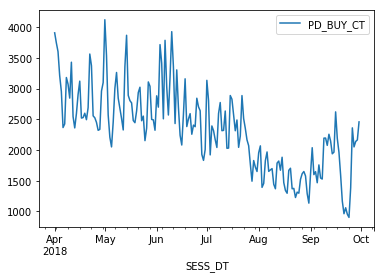

In [6]:
p1 = fashion1.loc[ fashion1['CLAC1_NM'] == '남성의류' ].groupby('SESS_DT').sum().plot()

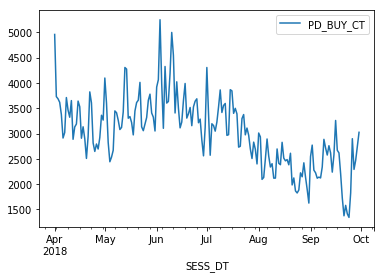

In [44]:
p2 = fashion1.loc[ fashion1['CLAC1_NM'] == '여성의류' ].groupby('SESS_DT').sum().plot()

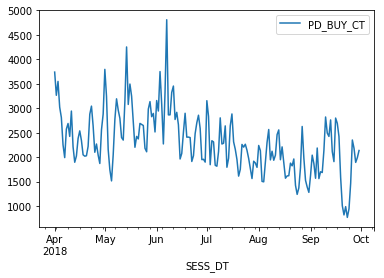

In [45]:
p3 = fashion1.loc[ fashion1['CLAC1_NM'] == '속옷/양말/홈웨어' ].groupby('SESS_DT').sum().plot()

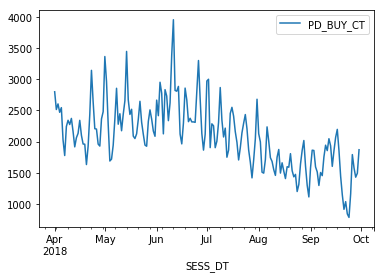

In [46]:
p4 = fashion1.loc[ fashion1['CLAC1_NM'] == '패션잡화' ].groupby('SESS_DT').sum().plot()